# Cleaning data from transfermarkt

## We are cleaning the data of 25 leagues across the globe and assesing nearly a million transfers.

First, the imports:

In [24]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import fuzzy_pandas as fpd

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

require('tidyverse')
library(scales)

R[write to console]: Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


R[write to console]: 
Attaching package: ‘scales’


R[write to console]: The following object is masked from ‘package:purrr’:

    discard


R[write to console]: The following object is masked from ‘package:readr’:

    col_factor




### Merging all the dataframes into one big DF. 

In [5]:
bundesliga_df = pd.read_csv('data/1-bundesliga.csv')
championship_df = pd.read_csv('data/championship.csv')
laliga_df = pd.read_csv('data/primera-division.csv')
ligue1_df = pd.read_csv('data/ligue-1.csv')
seriea_df = pd.read_csv('data/serie-a.csv')
liganos_df = pd.read_csv('data/liga-nos.csv')
eredivisie_df = pd.read_csv('data/eredivisie.csv')
russian_league_df = pd.read_csv('data/premier-liga.csv')
prem_df = pd.read_csv('data/premier-league.csv')
brazil_df = pd.read_csv('data/campeonato-brasileiro-serie-a.csv')
china_df = pd.read_csv('data/chinese-super-league.csv')
japan_df = pd.read_csv('data/j1-league.csv')
sweden_df = pd.read_csv('data/allsvenskan.csv')
turkey_df = pd.read_csv('data/super-lig.csv')
usa_df = pd.read_csv('data/major-league-soccer.csv')
mexico_df = pd.read_csv('data/liga-mx-apertura.csv')
saudi_df = pd.read_csv('data/saudi-professional-league.csv')
scot_df = pd.read_csv('data/scottish-premiership.csv')
norway_df = pd.read_csv('data/eliteserien.csv')
austria_df = pd.read_csv('data/bundesliga.csv')
belgium_df = pd.read_csv('data/juliper-pro-league.csv')
korean_df = pd.read_csv('data/k-league-1.csv')
denmark_df = pd.read_csv('data/superligaen.csv')
argentina_df = pd.read_csv('data/superliga.csv')

In [6]:
df = pd.concat([argentina_df, denmark_df, korean_df, belgium_df, austria_df, norway_df, scot_df, mexico_df, saudi_df, sweden_df, usa_df, turkey_df, china_df, japan_df, prem_df, bundesliga_df, brazil_df, championship_df, laliga_df, ligue1_df, seriea_df, liganos_df, eredivisie_df, russian_league_df], ignore_index=True)
df.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country
0,Club Atlético Aldosivi,César Carranza,33.0,Centre-Forward,Club Ferro Carril Oeste,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
1,Club Atlético Aldosivi,Gonzalo Bozzoni,24.0,Left-Back,Club Atlético Atlanta,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
2,Club Atlético Aldosivi,Matías Lequi,33.0,Centre-Back,Sportivo Luqueño,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
3,Club Atlético Aldosivi,Alejandro Capurro,33.0,Central Midfield,Club de Gimnasia y Esgrima La Plata,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
4,Club Atlético Aldosivi,Darío Gandín,30.0,Centre-Forward,CA Colon,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina


### Since we will be using the country column to assess outgoings and not incoming transfers, it is best to remove them at this stage.

In [15]:
#remove the country column from df
df = df.drop(['country'], axis=1)

In [16]:
df_in = df[df['transfer_movement'] == 'in']
df_in.head()


,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,Club Atlético Aldosivi,César Carranza,33.0,Centre-Forward,Club Ferro Carril Oeste,free transfer,in,Summer,0.0,Superliga,2014,2014/2015
1,Club Atlético Aldosivi,Gonzalo Bozzoni,24.0,Left-Back,Club Atlético Atlanta,free transfer,in,Summer,0.0,Superliga,2014,2014/2015
2,Club Atlético Aldosivi,Matías Lequi,33.0,Centre-Back,Sportivo Luqueño,free transfer,in,Summer,0.0,Superliga,2014,2014/2015
3,Club Atlético Aldosivi,Alejandro Capurro,33.0,Central Midfield,Club de Gimnasia y Esgrima La Plata,free transfer,in,Summer,0.0,Superliga,2014,2014/2015
4,Club Atlético Aldosivi,Darío Gandín,30.0,Centre-Forward,CA Colon,free transfer,in,Summer,0.0,Superliga,2014,2014/2015


In [8]:
len(df_in)


189118

In [36]:
#sum the fee_cleaned for every league_name and every year
league = df_in.groupby(['league_name', 'year']).sum('fee_cleaned').reset_index()
#remove age column
league = league.drop(['age'], axis=1)
league.head()


,league_name,year,fee_cleaned
0,1 Bundesliga,1992,29.395
1,1 Bundesliga,1993,37.889
2,1 Bundesliga,1994,54.262
3,1 Bundesliga,1995,78.113
4,1 Bundesliga,1996,51.239


In [37]:
#show me unique league_names
league['league_name'].unique()

array(['1 Bundesliga', 'Allsvenskan', 'Bundesliga',
       'Campeonato Brasileiro Serie A', 'Championship',
       'Chinese Super League', 'Eliteserien', 'Eredivisie', 'J1 League',
       'Juliper Pro League', 'K League 1', 'Liga Mx Apertura', 'Liga Nos',
       'Ligue 1', 'Major League Soccer', 'Premier League', 'Premier Liga',
       'Primera Division', 'Saudi Professional League',
       'Scottish Premiership', 'Serie A', 'Super Lig', 'Superliga',
       'Superligaen'], dtype=object)

In [38]:
#only keep Premier League, Bundesliga, 'Primera Division, Ligue 1, Serie A
graph = league[league['league_name'].isin(['Premier League', '1 Bundesliga', 'Primera Division', 'Ligue 1', 'Serie A'])]

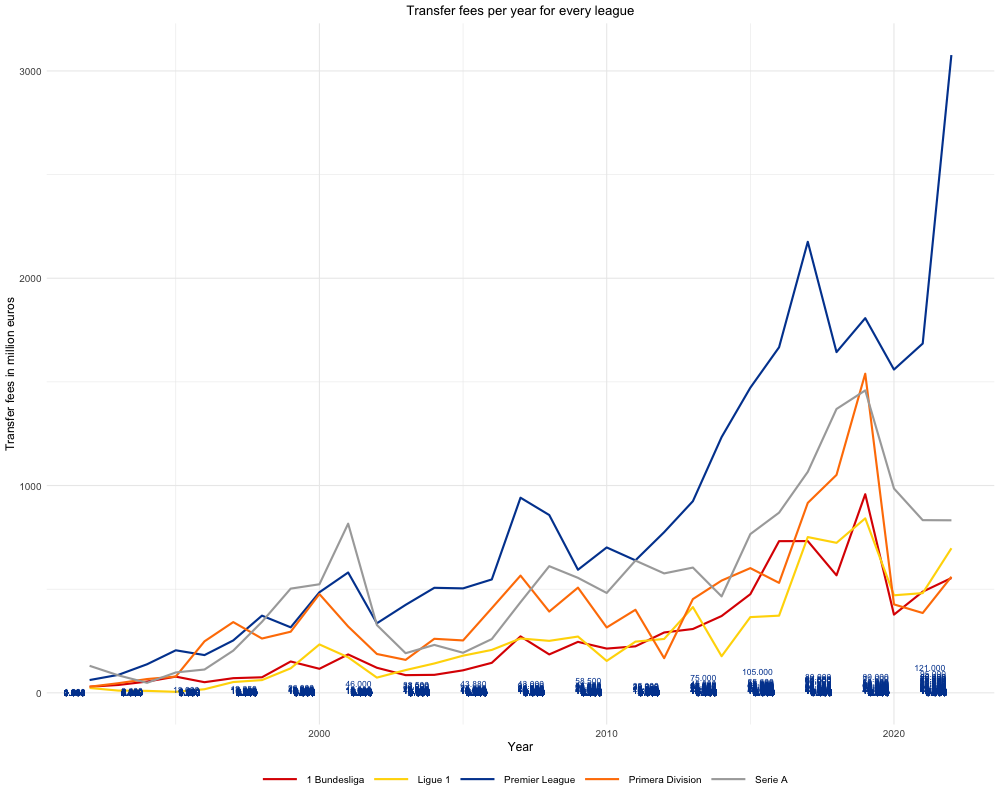

In [42]:
%%R -i graph -w 1000 -h 800 
library(ggplot2)
library(scales)

# Set color palette
colors <- c("#00449E", "#DD0000", "#FF7F00", "#FFD700", "#A9A9A9")
names(colors) <- c("Premier League", "1 Bundesliga", "Primera Division", "Ligue 1", "Serie A")

# Plot with highlighted Premier League and colored lines for other leagues
ggplot(graph, aes(x = year, y = fee_cleaned, group = league_name, color = league_name)) +
  geom_line(size = 1) +
  scale_color_manual(values = colors) +
  labs(title = "Transfer fees per year for every league", x = "Year", y = "Transfer fees in million euros") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5),
        legend.position = "bottom",
        legend.title = element_blank(),
        legend.key.width = unit(1.5, "cm"),
        legend.key.height = unit(0.7, "cm"),
        legend.text = element_text(size = 10),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10)) +
  geom_text(data = subset(euro_league, league_name == "Premier League" & year %% 2 == 0),
            aes(label = comma(fee_cleaned), color = league_name),
            hjust = 1.2, vjust = 0.5, size = 3, show.legend = FALSE)


## Adding a column to analyse the Outgoing transfers and proving/disproving Tebas' point
### We will be making a flowy Alluvial diagram on Rawgraphs for this 

In [53]:
#First, we read in which countries the clubs are from
spain_df = pd.read_csv('nation/spain_clubs.csv')
spain_df['country'] = 'Spain'

germany_df = pd.read_csv('nation/germany_clubs.csv')
germany_df['country'] = 'Germany'

italy_df = pd.read_csv('nation/italy_clubs.csv')
italy_df['country'] = 'Italy'

france_df = pd.read_csv('nation/france_clubs.csv')
france_df['country'] = 'France'

scotland_df = pd.read_csv('nation/scotland_clubs.csv')
scotland_df['country'] = 'Scotland'

belgium_df = pd.read_csv('nation/belgium_clubs.csv')
belgium_df['country'] = 'Belgium'

turkey_df = pd.read_csv('nation/turkey_clubs.csv')
turkey_df['country'] = 'Turkey'

korea_df = pd.read_csv('nation/korea_clubs.csv')
korea_df['country'] = 'Korea'

japan_df = pd.read_csv('nation/japan_clubs.csv')
japan_df['country'] = 'Japan'

netherlands_df = pd.read_csv('nation/netherlands_clubs.csv')
netherlands_df['country'] = 'Netherlands'

brazil_df = pd.read_csv('nation/brazil_clubs.csv')
brazil_df['country'] = 'Brazil'

portugal_df = pd.read_csv('nation/portugal_clubs.csv')
portugal_df['country'] = 'Portugal'

ukraine_df = pd.read_csv('nation/ukraine_clubs.csv')
ukraine_df['country'] = 'Ukraine'

denmark_df = pd.read_csv('nation/denmark_clubs.csv')
denmark_df['country'] = 'Denmark'

russia_df = pd.read_csv('nation/russia_clubs.csv')
russia_df['country'] = 'Russia'

sweden_df = pd.read_csv('nation/sweden_clubs.csv')
sweden_df['country'] = 'Sweden'

austria_df = pd.read_csv('nation/austria_clubs.csv')
austria_df['country'] = 'Austria'

england_df = pd.read_csv('nation/england_clubs.csv')
england_df['country'] = 'England'

In [58]:
#we are concating them all to prep for the join
country_df = pd.concat([austria_df, england_df, russia_df, sweden_df, spain_df, denmark_df, ukraine_df, germany_df, italy_df, france_df, scotland_df, belgium_df, turkey_df, korea_df, japan_df, netherlands_df, brazil_df, portugal_df], ignore_index=True)
country_df.sample(5)

,Squad,Gender,Comp,From,To,Comps,Champs,Other Names,country
648,Mossley AFC,M,NaN,2017-2018,2022-2023,0,NaN,NaN,England
537,Kirby Muxloe SC,M,NaN,2017-2018,2020-2021,0,NaN,Kirby Muxloe FC,England
2711,US Granville,M,NaN,2015-2016,2022-2023,0,0.0,NaN,France
2050,Pink Bari Calcio,F,NaN,2018-2019,2020-2021,3,NaN,NaN,Italy
817,Sleaford Town FC,M,NaN,2017-2018,2022-2023,0,NaN,NaN,England


In [43]:
#cleaning up the main dataframe for our analysis
#make a new df where the year is more than 2017
out = df_in[df_in['year'] > 2017]
out = out[out['league_name'].isin(['Premier League', '1 Bundesliga', 'Primera Division', 'Ligue 1', 'Serie A'])]
out = out.dropna(subset=['fee_cleaned'])

In [59]:
#this is the join
results = fpd.fuzzy_merge(out, country_df,
            left_on=['club_involved_name'],
            right_on=['Squad'],
            keep_left=['club_name','player_name', 'club_involved_name', 'transfer_movement', 'transfer_period', 'fee_cleaned', 'league_name'],
            keep_right=['Squad', 'country'])


In [60]:
results

,club_name,player_name,club_involved_name,transfer_movement,transfer_period,fee_cleaned,league_name,Squad,country
0,Manchester City,Philippe Sandler,PEC Zwolle,in,Summer,2.50,Premier League,PEC Zwolle,Netherlands
1,Manchester United,Diogo Dalot,FC Porto,in,Summer,22.00,Premier League,FC Porto,Portugal
2,Liverpool FC,Alisson,AS Roma,in,Summer,62.50,Premier League,AS Roma,Italy
3,Liverpool FC,Alisson,AS Roma,in,Summer,62.50,Premier League,AS Roma,Italy
4,Liverpool FC,Naby Keïta,RB Leipzig,in,Summer,60.00,Premier League,RB Leipzig,Germany
...,...,...,...,...,...,...,...,...,...
2536,Spezia Calcio,Eldor Shomurodov,AS Roma,in,Winter,1.50,Serie A,AS Roma,Italy
2537,US Salernitana 1919,William Troost-Ekong,Watford FC,in,Winter,0.50,Serie A,Watford FC,England
2538,US Salernitana 1919,Domen Crnigoj,Venezia FC,in,Winter,0.35,Serie A,Venezia FC,Italy
2539,US Lecce,Youssef Maleh,ACF Fiorentina,in,Winter,0.50,Serie A,ACF Fiorentina,Italy


In [66]:
#show me unique country
results['country'].unique()

array(['Netherlands', 'Portugal', 'Italy', 'Germany', 'France', 'England',
       'Spain', 'Other', 'Belgium'], dtype=object)

In [68]:
#if the country is Sweden, Denmark, Scotland, Japan, Brazil, Turkey, Korea, Austria change the country to Other
results.loc[results['country'].isin(['Sweden', 'Denmark', 'Scotland', 'Japan', 'Brazil', 'Turkey', 'Korea', 'Belgium' 'Austria']), 'country'] = 'Other'

In [69]:
results.to_csv('outgoings.csv', index=False)